# **Stock Market Analysis Project**

We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017.
____
____

## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
____
## Import data from pandas datareader

We use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2020

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 1, 1)

**Tesla**

In [5]:
tesla = web.DataReader("TSLA", 'yahoo', start, end)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


**Ford**

In [6]:
ford = web.DataReader("F", 'yahoo', start, end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


**General moter**

In [7]:
gm = web.DataReader("GM",'yahoo',start,end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


_____
_____

## Visualizing the Data

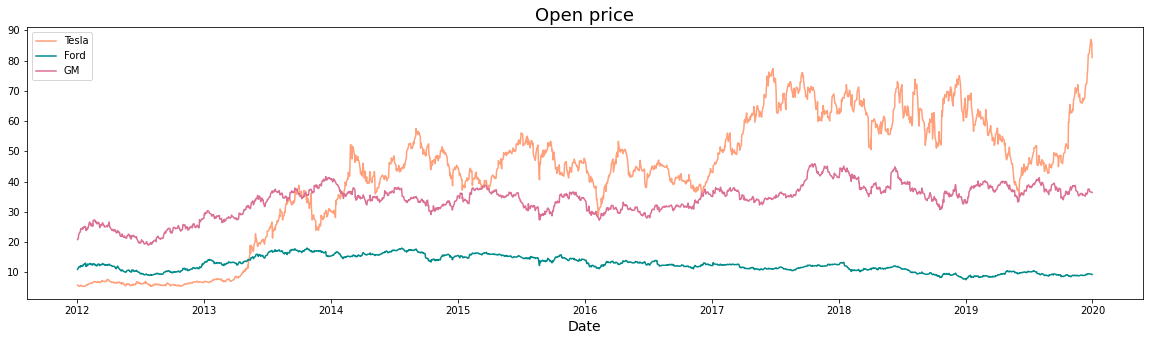

In [8]:
fig = plt.subplots(figsize = (20, 5))
plt.plot(tesla['Open'], label = 'Tesla', color = 'lightsalmon')
plt.plot(ford['Open'], label = 'Ford', color = 'darkcyan')
plt.plot(gm['Open'], label = 'GM', color = 'palevioletred')
plt.title('Open price', fontsize = 18)
plt.xlabel('Date', fontsize = 14)
plt.legend()
plt.show()

Looking at this plot, the open price time series visualization looks like its always been much more valuable as a company than GM and Ford. 
<br>
But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present.

**Plot the Volume of stock traded each day**

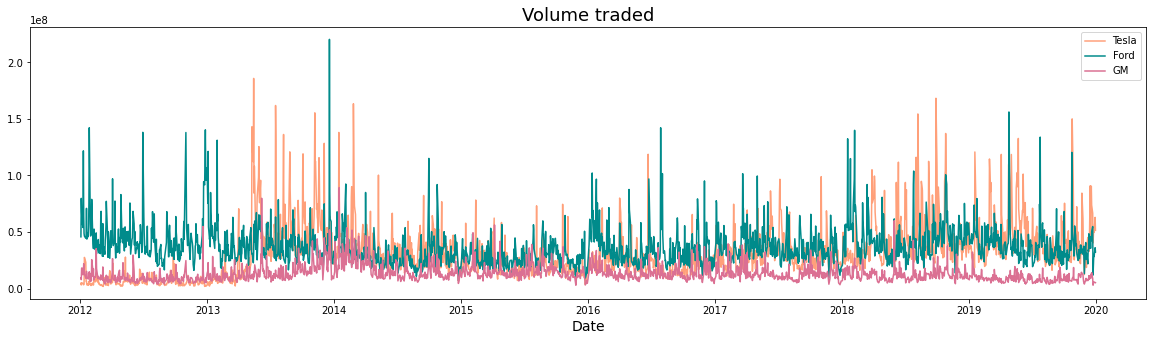

In [9]:
fig = plt.subplots(figsize = (20, 5))
plt.plot(tesla['Volume'], label = 'Tesla', color = 'lightsalmon')
plt.plot(ford['Volume'], label = 'Ford', color = 'darkcyan')
plt.plot(gm['Volume'], label = 'GM', color = 'palevioletred')
plt.title('Volume traded', fontsize = 18)
plt.xlabel('Date', fontsize = 14)
plt.legend()
plt.show()

**Plot the total traded**

With a simple calcualtion we can represent the amount total of money traded by multplying the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series.

In [10]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

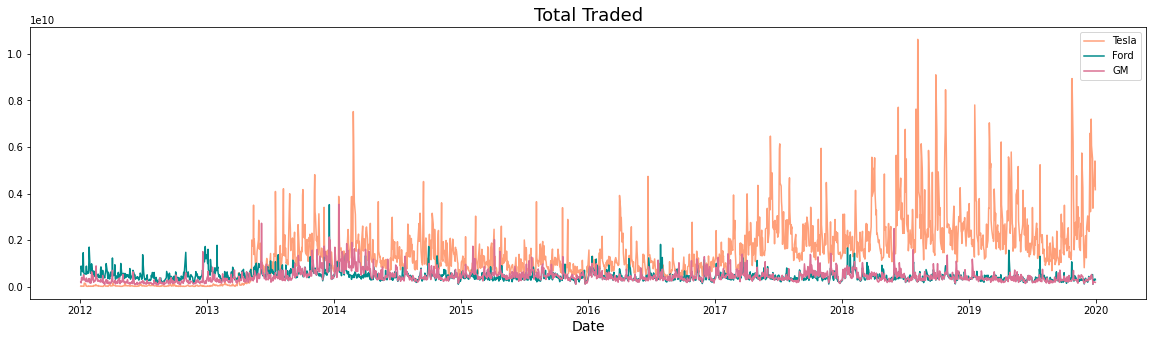

In [11]:
fig = plt.subplots(figsize = (20, 5))
plt.plot(tesla['Total Traded'], label = 'Tesla', color = 'lightsalmon')
plt.plot(ford['Total Traded'], label = 'Ford', color = 'darkcyan')
plt.plot(gm['Total Traded'], label = 'GM', color = 'palevioletred')
plt.title('Total Traded', fontsize = 18)
plt.xlabel('Date', fontsize = 14)
plt.legend()
plt.show()

It looks like there was huge amount of money traded for Tesla somewhere in early 2014.

**Plot the moving averages**
<br>
MA50 and MA200

In [12]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()

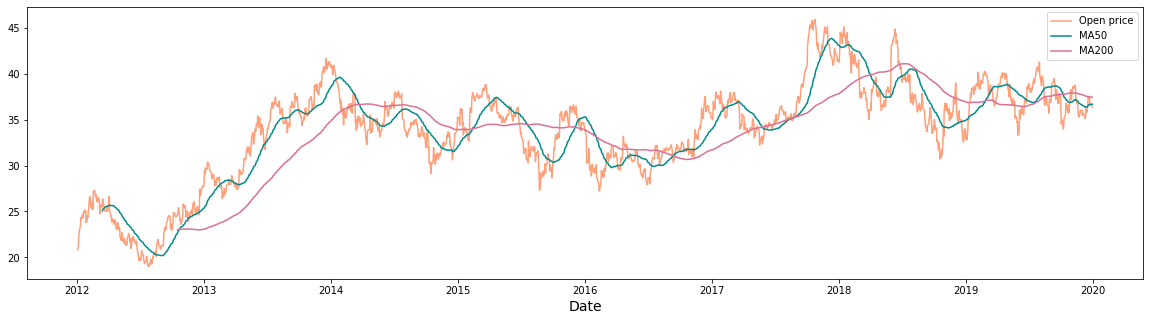

In [13]:
fig = plt.subplots(figsize = (20, 5))
plt.plot(gm['Open'], label = 'Open price', color = 'lightsalmon')
plt.plot(gm['MA50'], label = 'MA50', color = 'darkcyan')
plt.plot(gm['MA200'], label = 'MA200', color = 'palevioletred')
plt.xlabel('Date', fontsize = 14)
plt.legend()
plt.show()

**Is there a relationship between this stocks ? After all it's the same industry.**

In [14]:
from pandas.plotting import scatter_matrix

In [15]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [16]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

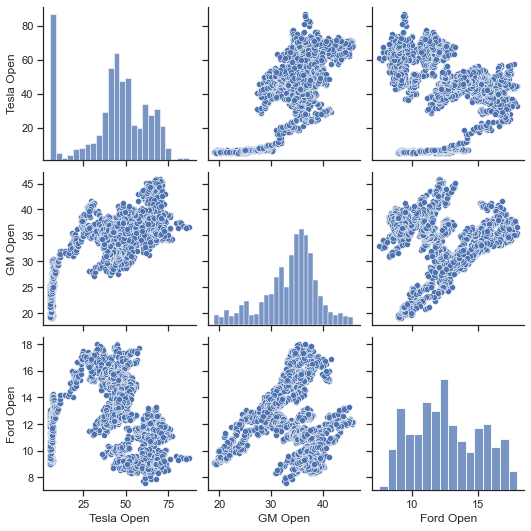

In [17]:
import seaborn as sns
sns.set_theme(style = 'ticks')
sns.pairplot(car_comp)

____
____
## Analysis

**Daily Percentage Change**

In [18]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [19]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [20]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


In [21]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,NaN,NaN,-0.003490


Histogram of ech return

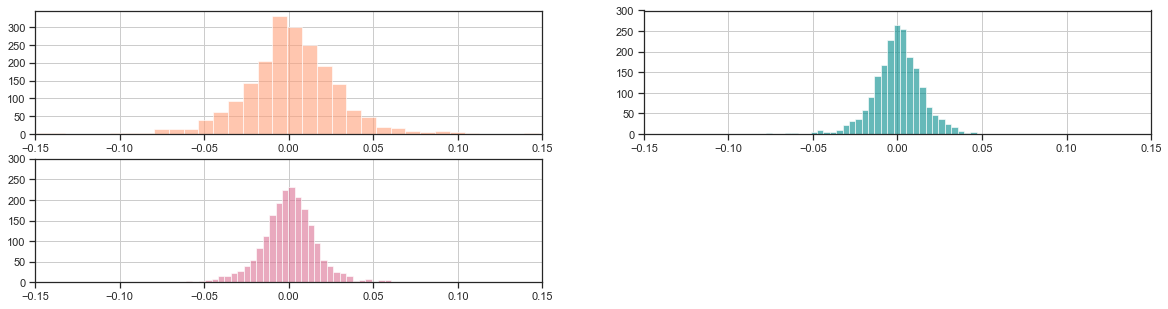

In [22]:
fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(2,2,1)
ax1.hist(tesla['returns'],  bins = 50, color = 'lightsalmon', alpha = 0.6)
ax1.set_xlim(-0.15,0.15)
ax1.set_yticks(np.arange(0, 350, 50))
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
ax2.hist(ford['returns'], bins = 50, color = 'darkcyan', alpha = 0.6)
ax2.set_xlim(-0.15,0.15)
ax2.set_yticks(np.arange(0, 350, 50))
ax2.grid()
ax3 = fig.add_subplot(2,2,3)
ax3.hist(gm['returns'], bins = 50, color = 'palevioletred', alpha = 0.6)
ax3.set_xlim(-0.15,0.15)
ax3.set_yticks(np.arange(0, 350, 50))
ax3.grid()
plt.show()

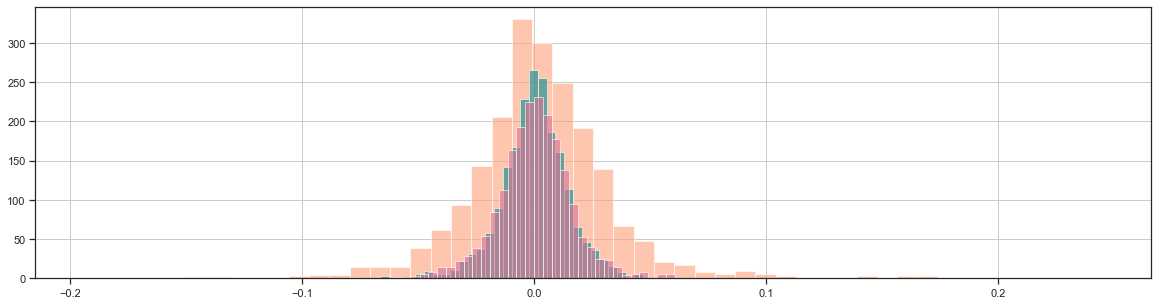

In [23]:
fig = plt.figure(figsize = (20, 5))
plt.hist(tesla['returns'],  bins = 50, color = 'lightsalmon', alpha = 0.6)
plt.hist(ford['returns'], bins = 50, color = 'darkcyan', alpha = 0.6)
plt.hist(gm['returns'], bins = 50, color = 'palevioletred', alpha = 0.6)
plt.grid()
plt.show()

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

In [24]:
return_comp = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
return_comp.columns = ['Tesla return','GM return','Ford return']

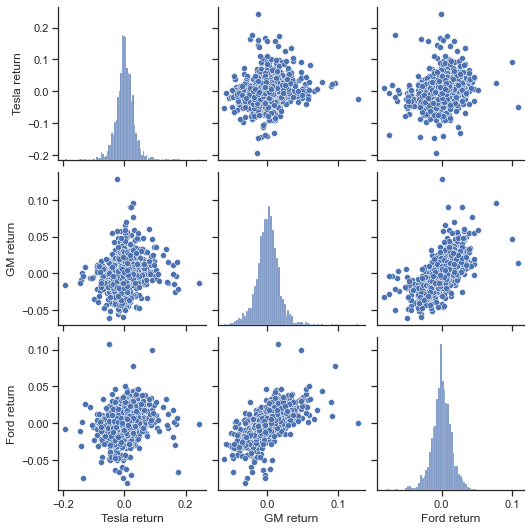

In [25]:
sns.set_theme(style = 'ticks')
sns.pairplot(return_comp)

It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely.

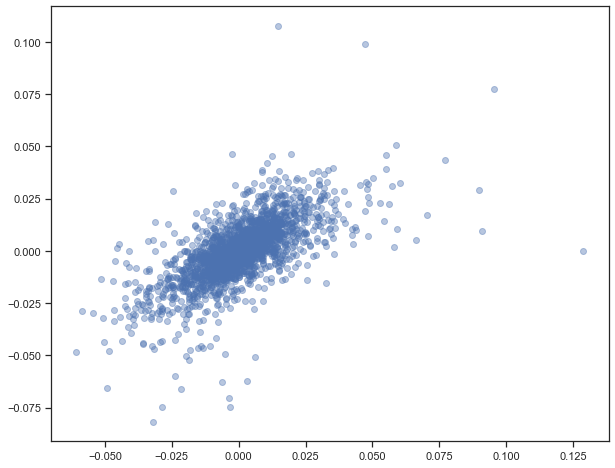

In [26]:
fig = plt.figure(figsize = (10, 8))
plt.scatter(return_comp['GM return'], return_comp['Ford return'], alpha = 0.4)

____
____
## Cumulative Daily Returns

With the cumulatove return we can see which stock showed the highest return for 1$ investment.

In [27]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [28]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635,0.970442


In [29]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686,1.060198


In [30]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,NaN,NaN,-0.003490,1.085036


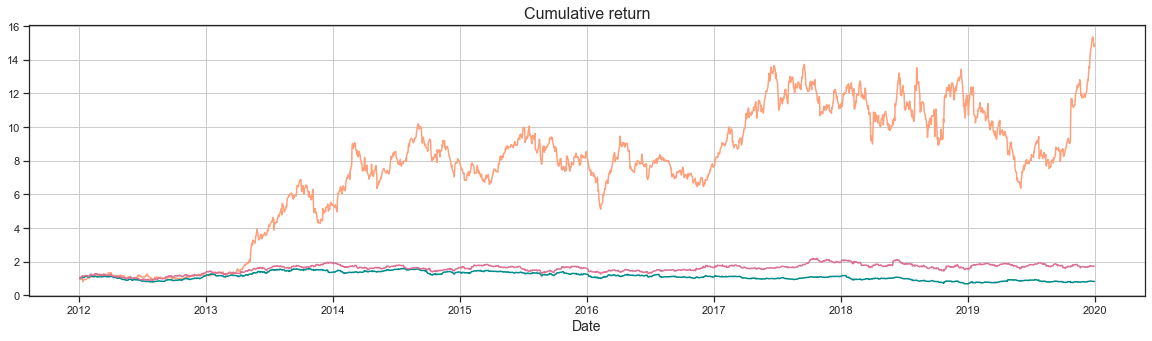

In [31]:
fig = plt.figure(figsize = (20, 5))
plt.plot(tesla['Cumulative Return'], color = 'lightsalmon')
plt.plot(ford['Cumulative Return'], color = 'darkcyan')
plt.plot(gm['Cumulative Return'], color = 'palevioletred')
plt.title('Cumulative return', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.grid()
plt.show()